In [15]:
import matplotlib.pyplot as p
import numpy as np
import hyperspy.api as hs
import atomap.api as am
import pathlib as Path

In [16]:
path = "4DSTEM/Datos/"

s = hs.load(path+"s_adf_IFFT.tif")

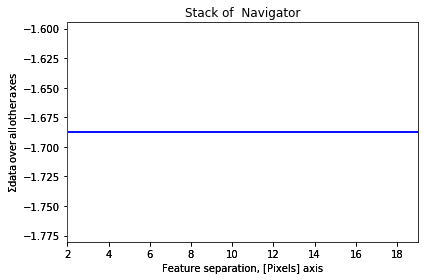

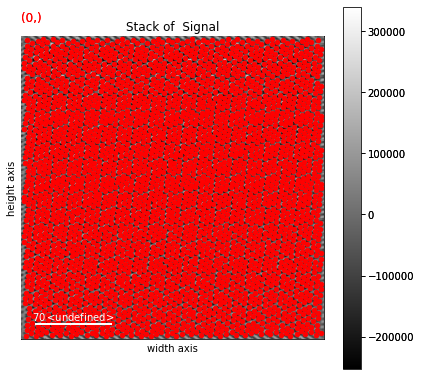

In [17]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=False)
s_peaks.plot()

In [43]:
atom_positions = am.get_atom_positions(s, separation=3)

3213

In [19]:
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:3213,planes:0)>

In [20]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

In [38]:
sublattice.get_position_history().plot()

<Signal2D, title: Stack of , dimensions: (3|284, 284)>

In [44]:
atom_list = sublattice.atom_list
atom_list

[<Atom_Position,  (x:31.0,y:21.1,sx:1.4,sy:1.1,r:0.0,e:1.2)>,
 <Atom_Position,  (x:35.3,y:24.0,sx:1.5,sy:1.3,r:3.1,e:1.2)>,
 <Atom_Position,  (x:26.8,y:18.1,sx:1.3,sy:1.0,r:0.1,e:1.3)>,
 <Atom_Position,  (x:36.0,y:18.7,sx:1.2,sy:0.9,r:3.1,e:1.3)>,
 <Atom_Position,  (x:26.0,y:23.3,sx:1.1,sy:0.8,r:3.1,e:1.4)>,
 <Atom_Position,  (x:30.2,y:26.3,sx:1.1,sy:0.8,r:0.0,e:1.3)>,
 <Atom_Position,  (x:31.9,y:15.8,sx:1.2,sy:0.9,r:0.0,e:1.3)>,
 <Atom_Position,  (x:95.9,y:26.0,sx:1.6,sy:1.3,r:3.0,e:1.2)>,
 <Atom_Position,  (x:193.8,y:30.8,sx:1.2,sy:1.0,r:2.9,e:1.2)>,
 <Atom_Position,  (x:43.8,y:30.0,sx:1.6,sy:1.2,r:3.1,e:1.3)>,
 <Atom_Position,  (x:148.2,y:22.0,sx:1.4,sy:1.2,r:3.1,e:1.1)>,
 <Atom_Position,  (x:265.2,y:23.0,sx:1.4,sy:1.2,r:3.0,e:1.2)>,
 <Atom_Position,  (x:40.3,y:21.7,sx:1.2,sy:0.9,r:3.0,e:1.3)>,
 <Atom_Position,  (x:39.6,y:27.0,sx:1.2,sy:1.0,r:0.1,e:1.2)>,
 <Atom_Position,  (x:198.1,y:33.8,sx:1.2,sy:1.0,r:2.9,e:1.2)>,
 <Atom_Position,  (x:260.9,y:20.0,sx:1.4,sy:1.2,r:3.1,e:1.2)>,
 <A

In [41]:
sublattice.construct_zone_axes()
sublattice

<Sublattice,  (atoms:3213,planes:6)>

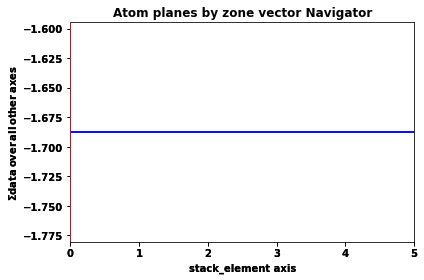

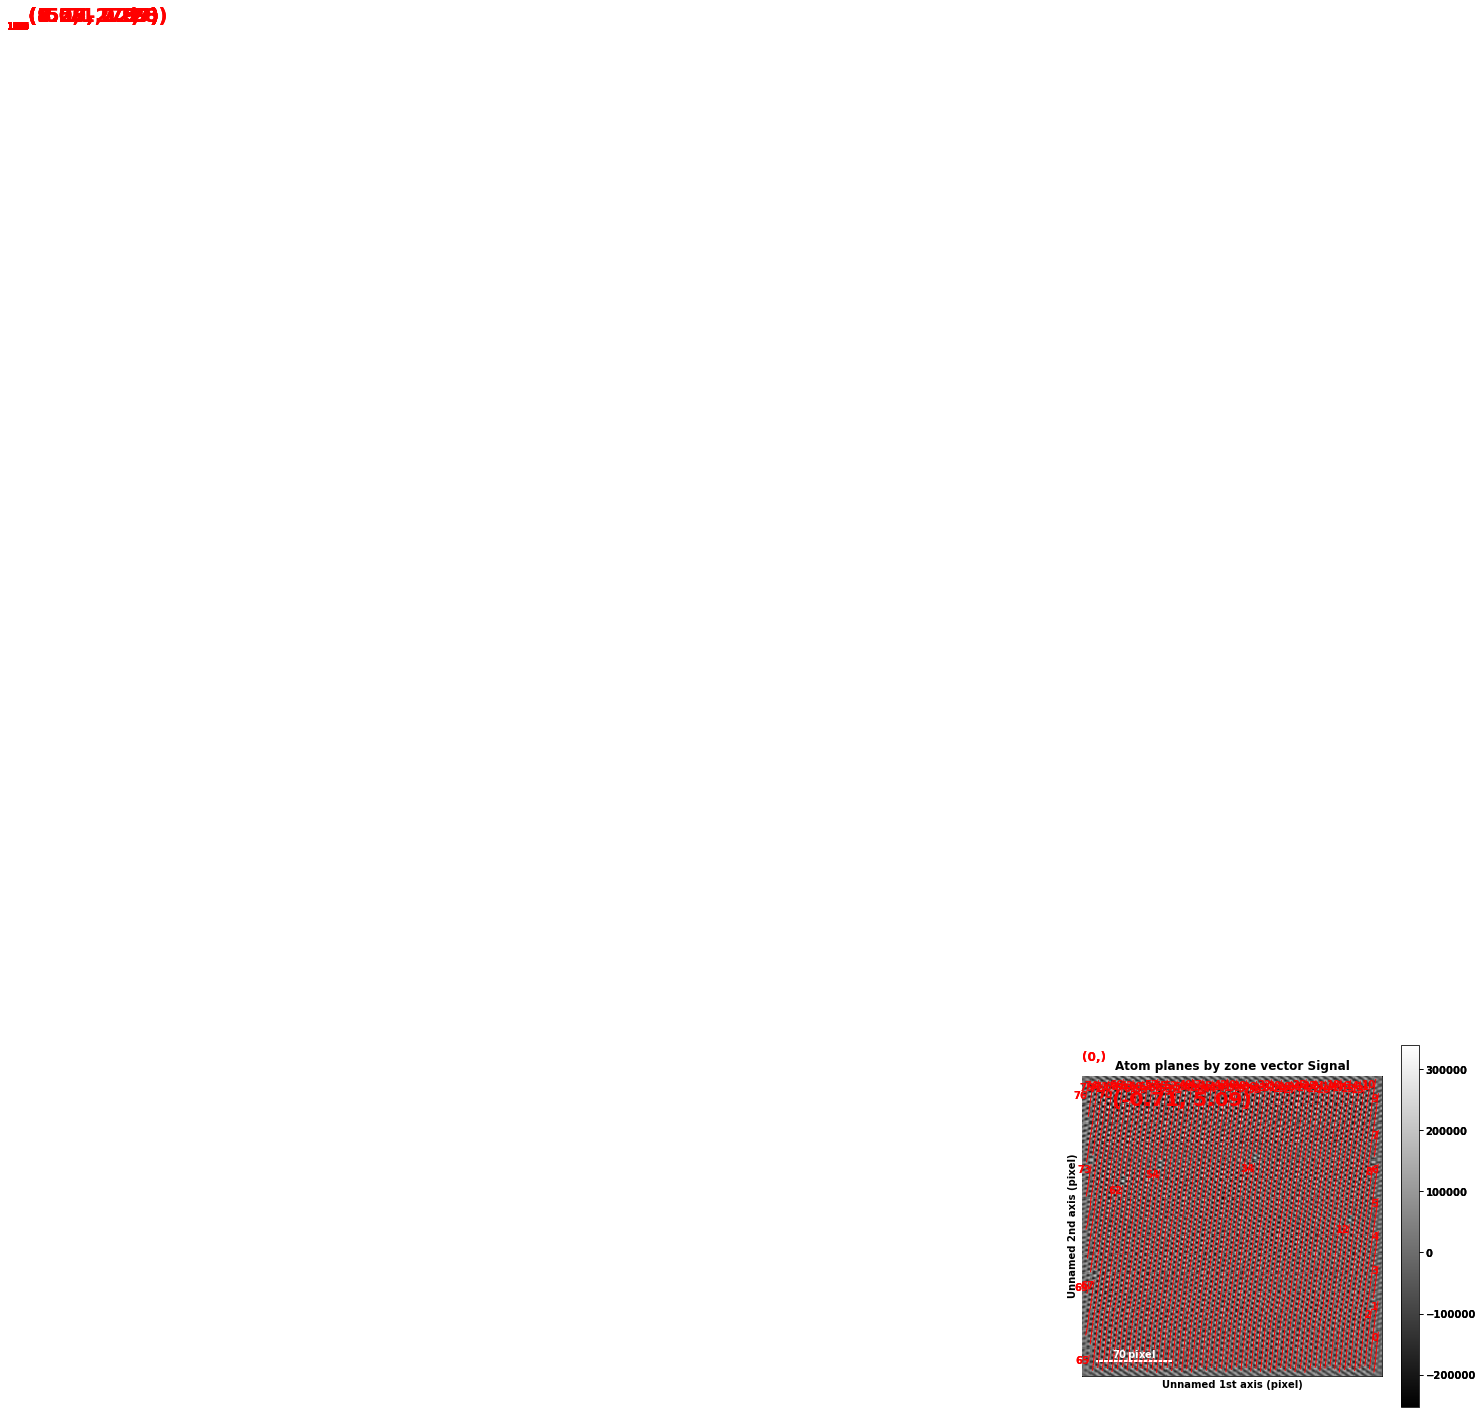

In [34]:
sublattice.plot_planes()

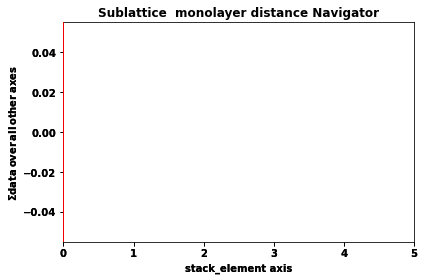

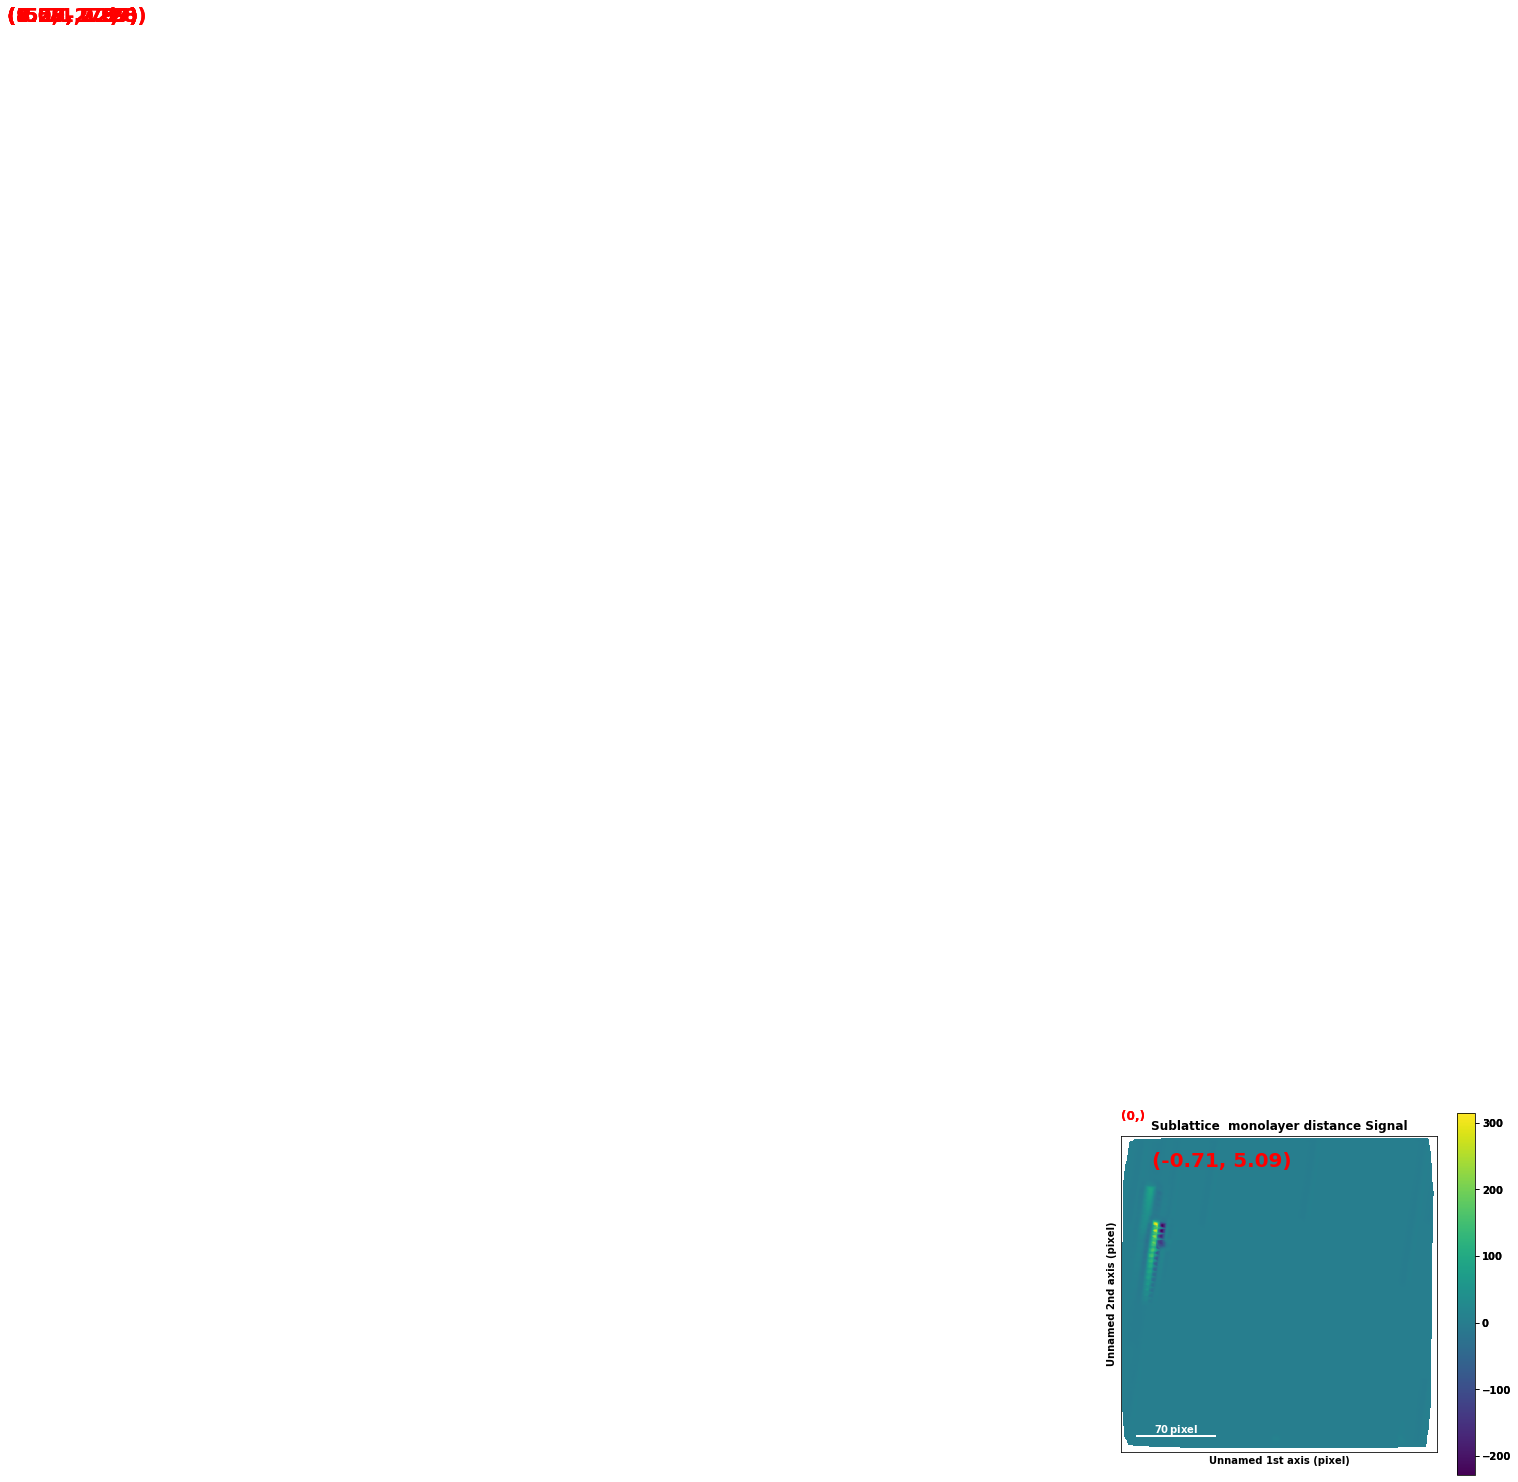

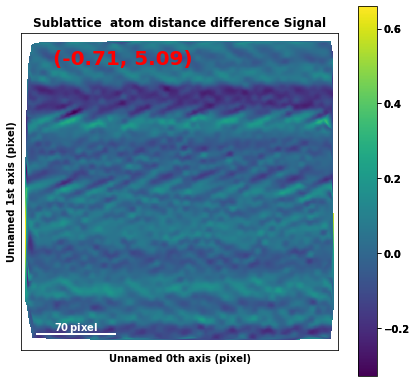

In [43]:
s_monolayer = sublattice.get_monolayer_distance_map()
s_monolayer.plot(cmap='viridis')
zone = sublattice.zones_axis_average_distances[0]
s_dd = sublattice.get_atom_distance_difference_map([zone])
s_dd.plot(cmap='viridis')